In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score
import torch
from torch import nn, optim
import torch.nn.functional as F
import matplotlib.pyplot as plt
torch.manual_seed(0)

In [13]:
print("Number of GPU: ", torch.cuda.device_count())
print("GPU Name: ", torch.cuda.get_device_name())


device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device:', device)

Number of GPU:  1
GPU Name:  NVIDIA GeForce RTX 4050 Laptop GPU
Using device: cuda


In [4]:
data = pd.read_csv("creditcarddata.csv")
data

,LIMIT_BAL,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,0.080808,0.333333,0.666667,0.224138,0.2,0.2,0.2,0.2,0.2,0.2,...,0.173637,0.095470,0.272928,0.001738,0.000891,0.001116,0.001610,0.002345,0.009458,0
1,0.040404,0.333333,0.333333,0.275862,0.2,0.2,0.2,0.2,0.2,0.2,...,0.186809,0.109363,0.283685,0.002290,0.001199,0.001339,0.001771,0.002506,0.001892,0
2,0.040404,0.333333,0.333333,0.620690,0.1,0.2,0.1,0.2,0.2,0.2,...,0.179863,0.099633,0.275681,0.002290,0.021779,0.011160,0.014493,0.001615,0.001284,0
3,0.040404,0.166667,0.666667,0.275862,0.2,0.2,0.2,0.2,0.2,0.2,...,0.178407,0.100102,0.276367,0.002862,0.001078,0.000733,0.001610,0.002345,0.001513,0
4,0.494949,0.166667,0.666667,0.137931,0.2,0.2,0.2,0.2,0.2,0.2,...,0.671310,0.559578,0.625196,0.062961,0.023749,0.042409,0.032591,0.032237,0.026047,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46723,0.030303,0.166667,0.666667,0.034483,0.4,0.4,0.4,0.2,0.2,0.2,...,0.180315,0.103520,0.279179,0.001717,0.000594,0.001116,0.003221,0.002345,0.001691,1
46724,0.040404,0.500000,0.333333,0.534483,0.2,0.2,0.4,0.1,0.2,0.2,...,0.173872,0.091784,0.269281,0.001896,0.000000,0.016272,0.000805,0.001074,0.001651,1
46725,0.252525,0.333333,0.333333,0.362069,0.5,0.5,0.4,0.4,0.2,0.2,...,0.356844,0.291934,0.428001,0.000000,0.004750,0.000000,0.012560,0.018287,0.015700,1
46726,0.020202,0.333333,0.333333,0.551724,0.2,0.2,0.2,0.2,0.2,0.4,...,0.176827,0.099904,0.275557,0.001717,0.000891,0.001786,0.003221,0.000000,0.002837,1


In [14]:
x = data.iloc[:, :-1]
y = data["default payment next month"]

In [6]:
x

,LIMIT_BAL,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,0.080808,0.333333,0.666667,0.224138,0.2,0.2,0.2,0.2,0.2,0.2,...,0.093789,0.173637,0.095470,0.272928,0.001738,0.000891,0.001116,0.001610,0.002345,0.009458
1,0.040404,0.333333,0.333333,0.275862,0.2,0.2,0.2,0.2,0.2,0.2,...,0.113407,0.186809,0.109363,0.283685,0.002290,0.001199,0.001339,0.001771,0.002506,0.001892
2,0.040404,0.333333,0.333333,0.620690,0.1,0.2,0.1,0.2,0.2,0.2,...,0.106020,0.179863,0.099633,0.275681,0.002290,0.021779,0.011160,0.014493,0.001615,0.001284
3,0.040404,0.166667,0.666667,0.275862,0.2,0.2,0.2,0.2,0.2,0.2,...,0.117974,0.178407,0.100102,0.276367,0.002862,0.001078,0.000733,0.001610,0.002345,0.001513
4,0.494949,0.166667,0.666667,0.137931,0.2,0.2,0.2,0.2,0.2,0.2,...,0.330672,0.671310,0.559578,0.625196,0.062961,0.023749,0.042409,0.032591,0.032237,0.026047
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46723,0.030303,0.166667,0.666667,0.034483,0.4,0.4,0.4,0.2,0.2,0.2,...,0.097913,0.180315,0.103520,0.279179,0.001717,0.000594,0.001116,0.003221,0.002345,0.001691
46724,0.040404,0.500000,0.333333,0.534483,0.2,0.2,0.4,0.1,0.2,0.2,...,0.086535,0.173872,0.091784,0.269281,0.001896,0.000000,0.016272,0.000805,0.001074,0.001651
46725,0.252525,0.333333,0.333333,0.362069,0.5,0.5,0.4,0.4,0.2,0.2,...,0.203707,0.356844,0.291934,0.428001,0.000000,0.004750,0.000000,0.012560,0.018287,0.015700
46726,0.020202,0.333333,0.333333,0.551724,0.2,0.2,0.2,0.2,0.2,0.4,...,0.095343,0.176827,0.099904,0.275557,0.001717,0.000891,0.001786,0.003221,0.000000,0.002837


In [7]:
y

0        0
1        0
2        0
3        0
4        0
        ..
46723    1
46724    1
46725    1
46726    1
46727    1
Name: default payment next month, Length: 46728, dtype: int64

In [29]:
xnew, xtest, ynew, ytest = train_test_split(x, y, test_size=0.2, random_state=0)
dev_per = xtest.shape[0]/xnew.shape[0]
xtrain, xdev, ytrain, ydev = train_test_split(xnew, ynew, test_size=dev_per, random_state=0)

In [30]:
print(xnew.shape, xdev.shape, xtrain.shape, xtest.shape)

(37382, 22) (9346, 22) (28036, 22) (9346, 22)


In [60]:
xdevtorch = torch.tensor(xdev.values).float().cuda()
ydevtorch = torch.tensor(ydev.values).float().cuda()
xtesttorch = torch.tensor(xtest.values).float().cuda()
ytesttorch = torch.tensor(ytest.values).float().cuda()

print(xdevtorch.type,
      ydevtorch.type,
      xtesttorch.type,
      ytesttorch.type)

<built-in method type of Tensor object at 0x000002A092E59270> <built-in method type of Tensor object at 0x000002A092F59A40> <built-in method type of Tensor object at 0x000002A092F5BF70> <built-in method type of Tensor object at 0x000002A0D67F9F40>


In [61]:
# class Classifier(nn.Module):
#     def __init__(self, input_size):
#         super().__init__()
#         self.hidden_1 = nn.Linear(input_size, 10)
#         self.hidden_2 = nn.Linear(10, 10)
#         self.hidden_3 = nn.Linear(10,10)
#         self.output = nn.Linear(10,2)

#     def forward(self, x):
#         z = F.relu(self.hidden_1(x))
#         z = F.relu(self.hidden_2(z))
#         z = F.relu(self.hidden_3(z))
#         out = F.log_softmax(self.output(z), dim=1)

#         return out


In [62]:
# model = Classifier(xtrain.shape[1]).cuda()
# model

In [63]:
# criterion = nn.NLLLoss()
# optimizer = optim.Adam(model.parameters(), lr = 0.001)
# epochs = 10
# batchsize  = 128

In [64]:
# trainlosses, devlosses, trainacc, devacc = [], [], [], []
# x_axis = []

# for e in range(1, epochs+1):
#     x_, y_ = shuffle(xtrain, ytrain)
#     runningloss = 0
#     running_acc = 0
#     iterations = 0

#     for i in range(0, len(x_), batchsize):
#         iterations += 1
#         b = i + batchsize
#         x_batch = torch.tensor(x_.iloc[i:b,:].values).float().cuda()
#         y_batch = torch.tensor(y_.iloc[i:b].values).cuda()

#         log_ps = model(x_batch)
#         loss = criterion(log_ps, y_batch)
#         optimizer.zero_grad()
#         loss.backward()
#         optimizer.step()

#         runningloss += loss.item()
#         ps = torch.exp(log_ps)
#         top_p, top_class = ps.topk(1, dim=1)
#         # running_acc += accuracy_score(y_batch, top_class)
#         running_acc += accuracy_score(y_batch.cpu().numpy(), top_class.cpu().numpy())

#     devloss = 0
#     acc = 0

#     with torch.no_grad():
#         model.eval()
#         log_dev = model(xdevtorch)
#         devloss = criterion(log_dev, ydevtorch)

#         ps_dev = torch.exp(log_dev)
#         top_p, top_class_dev = ps_dev.topk(1, dim=1)
#         # acc = accuracy_score(ydevtorch, top_class_dev)
#         acc = accuracy_score(ydevtorch.cpu().numpy(), top_class_dev.cpu().numpy())
#     model.train()

#     if e%50 == 0 or e ==1:
#         x_axis.append(e)

#         trainlosses.append(runningloss/iterations)
#         devlosses.append(devloss)
#         trainacc.append(running_acc/iterations)
#         devacc.append(acc)

#         print("Epoch: {}/{}.. ".format(e, epochs),
#               "Training Loss: {:.3f}.. ".format(runningloss/iterations),
#               "Validation Loss: {:.3f}.. ".format(devloss),
#               "Training Accuracy: {:.3f}.. ".format(running_acc/iterations),
#               "Validation Accuracy: {:.3f}".format(acc))



In [65]:
### THAT RAN PERFECTLY

# import torch
# from sklearn.metrics import accuracy_score

# trainlosses, devlosses, trainacc, devacc = [], [], [], []
# x_axis = []

# for e in range(1, epochs + 1):
#     x_, y_ = shuffle(xtrain, ytrain)
#     runningloss = 0
#     running_acc = 0
#     iterations = 0

#     for i in range(0, len(x_), batchsize):
#         iterations += 1
#         b = min(i + batchsize, len(x_))  # Ensure not to go out of bounds
        
#         x_batch = torch.tensor(x_.iloc[i:b, :].values).float().cuda()
#         y_batch = torch.tensor(y_.iloc[i:b].values).long().cuda()  # Convert to long for classification

#         log_ps = model(x_batch)  # Assuming model outputs logits, not probabilities
#         log_ps = torch.log_softmax(log_ps, dim=1)  # Apply log_softmax

#         loss = criterion(log_ps, y_batch)
#         optimizer.zero_grad()
#         loss.backward()
#         optimizer.step()

#         runningloss += loss.item()
#         ps = torch.exp(log_ps)  # Convert log probabilities back to probabilities
#         top_p, top_class = ps.topk(1, dim=1)
#         running_acc += accuracy_score(y_batch.cpu().numpy(), top_class.cpu().numpy())

#     devloss = 0
#     acc = 0

#     with torch.no_grad():
#         log_dev = model(xdevtorch)
#         log_dev = torch.log_softmax(log_dev, dim=1)  # Apply log_softmax for dev data
#         ydevtorch = ydevtorch.long().cuda()  # Ensure targets are long and on GPU

#         devloss = criterion(log_dev, ydevtorch)

#         ps_dev = torch.exp(log_dev)  # Convert log probabilities back to probabilities
#         top_p, top_class_dev = ps_dev.topk(1, dim=1)
#         acc = accuracy_score(ydevtorch.cpu().numpy(), top_class_dev.cpu().numpy())

#     if e % 50 == 0 or e == 1:
#         x_axis.append(e)

#         trainlosses.append(runningloss / iterations)
#         devlosses.append(devloss.item())  # Ensure it's a scalar
#         trainacc.append(running_acc / iterations)
#         devacc.append(acc)

#         print("Epoch: {}/{}.. ".format(e, epochs),
#               "Training Loss: {:.3f}.. ".format(runningloss / iterations),
#               "Validation Loss: {:.3f}.. ".format(devloss.item()),  # Ensure it's a scalar
#               "Training Accuracy: {:.3f}.. ".format(running_acc / iterations),
#               "Validation Accuracy: {:.3f}".format(acc))


first se second - added hidden layer number 4 with relu
second se third - sab same hai  bas increased the number of neurons from 10 to 50 in each layer
third se fourth -  added method dropout , self.dropout, epoch raised from 1000 to 2000, added model.eval(), model.train()
fourth se fifth n final: increased neurons from 50 to 100, increased epochs from 2000 to 4000

In [70]:
class Classifier(nn.Module):
    def __init__(self, input_size):
        super().__init__()
        self.hidden_1 = nn.Linear(input_size, 100)
        self.hidden_2 = nn.Linear(100, 100)
        self.hidden_3 = nn.Linear(100,50)
        self.hidden_4 = nn.Linear(50,50)
        self.output = nn.Linear(50,2)

        self.dropout = nn.Dropout(p=0.1)

    def forward(self, x):
        z = self.dropout(F.relu(self.hidden_1(x)))
        z = self.dropout(F.relu(self.hidden_2(z)))
        z = self.dropout(F.relu(self.hidden_3(z)))
        z = self.dropout(F.relu(self.hidden_4(z)))
        out = F.log_softmax(self.output(z), dim=1)

        return out
    
model = Classifier(xtrain.shape[1]).cuda()
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

epochs = 4000
batchsize = 128

model

Classifier(
  (hidden_1): Linear(in_features=22, out_features=100, bias=True)
  (hidden_2): Linear(in_features=100, out_features=100, bias=True)
  (hidden_3): Linear(in_features=100, out_features=50, bias=True)
  (hidden_4): Linear(in_features=50, out_features=50, bias=True)
  (output): Linear(in_features=50, out_features=2, bias=True)
  (dropout): Dropout(p=0.1, inplace=False)
)

In [72]:
# trainlosses, devlosses, trainacc, devacc = [], [], [], []
# x_axis = []

# for e in range(1, epochs+1):
#     x_, y_ = shuffle(xtrain, ytrain)
#     runningloss = 0
#     running_acc = 0
#     iterations = 0

#     for i in range(0, len(x_), batchsize):
#         iterations += 1
#         b = i + batchsize
#         x_batch = torch.tensor(x_.iloc[i:b,:].values).float().cuda()
#         y_batch = torch.tensor(y_.iloc[i:b].values).long().cuda()

#         log_ps = model(x_batch)
#         loss = criterion(log_ps, y_batch)
#         optimizer.zero_grad()
#         loss.backward()
#         optimizer.step()

#         runningloss += loss.item()
#         ps = torch.exp(log_ps)
#         top_p, top_class = ps.topk(1, dim=1)
#         # running_acc += accuracy_score(y_batch, top_class)
#         running_acc += accuracy_score(y_batch.cpu().numpy(), top_class.cpu().numpy())

#     devloss = 0
#     acc = 0

#     with torch.no_grad():
#         model.eval()
#         log_dev = model(xdevtorch)
#         devloss = criterion(log_dev, ydevtorch)
#         ydevtorch_long = ydevtorch.long()

#         ps_dev = torch.exp(log_dev)
#         top_p, top_class_dev = ps_dev.topk(1, dim=1)
#         # acc = accuracy_score(ydevtorch, top_class_dev)
#         acc = accuracy_score(ydevtorch.cpu().numpy(), top_class_dev.cpu().numpy())
#     model.train()

#     if e%50 == 0 or e ==1:
#         x_axis.append(e)

#         trainlosses.append(runningloss/iterations)
#         devlosses.append(devloss)
#         trainacc.append(running_acc/iterations)
#         devacc.append(acc)

#         print("Epoch: {}/{}.. ".format(e, epochs),
#               "Training Loss: {:.3f}.. ".format(runningloss/iterations),
#               "Validation Loss: {:.3f}.. ".format(devloss),
#               "Training Accuracy: {:.3f}.. ".format(running_acc/iterations),
#               "Validation Accuracy: {:.3f}".format(acc))



In [73]:
trainlosses, devlosses, trainacc, devacc = [], [], [], []
x_axis = []

for e in range(1, epochs+1):
    x_, y_ = shuffle(xtrain, ytrain)
    runningloss = 0
    running_acc = 0
    iterations = 0

    for i in range(0, len(x_), batchsize):
        iterations += 1
        b = i + batchsize
        x_batch = torch.tensor(x_.iloc[i:b,:].values).float().cuda()
        y_batch = torch.tensor(y_.iloc[i:b].values).long().cuda()  # Change to long

        log_ps = model(x_batch)
        loss = criterion(log_ps, y_batch)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        runningloss += loss.item()
        ps = torch.exp(log_ps)
        top_p, top_class = ps.topk(1, dim=1)
        running_acc += accuracy_score(y_batch.cpu().numpy(), top_class.cpu().numpy())

    devloss = 0
    acc = 0

    with torch.no_grad():
        model.eval()
        log_dev = model(xdevtorch)
        ydevtorch_long = ydevtorch.long()  # Convert to long
        devloss = criterion(log_dev, ydevtorch_long)

        ps_dev = torch.exp(log_dev)
        top_p, top_class_dev = ps_dev.topk(1, dim=1)
        acc = accuracy_score(ydevtorch.cpu().numpy(), top_class_dev.cpu().numpy())
    model.train()

    if e%50 == 0 or e ==1:
        x_axis.append(e)

        trainlosses.append(runningloss/iterations)
        devlosses.append(devloss.item())  # Add .item() to get scalar value
        trainacc.append(running_acc/iterations)
        devacc.append(acc)

        print("Epoch: {}/{}.. ".format(e, epochs),
              "Training Loss: {:.3f}.. ".format(runningloss/iterations),
              "Validation Loss: {:.3f}.. ".format(devloss.item()),  # Add .item()
              "Training Accuracy: {:.3f}.. ".format(running_acc/iterations),
              "Validation Accuracy: {:.3f}".format(acc))

Epoch: 1/4000..  Training Loss: 0.584..  Validation Loss: 0.581..  Training Accuracy: 0.701..  Validation Accuracy: 0.701
Epoch: 50/4000..  Training Loss: 0.526..  Validation Loss: 0.545..  Training Accuracy: 0.735..  Validation Accuracy: 0.720
Epoch: 100/4000..  Training Loss: 0.503..  Validation Loss: 0.533..  Training Accuracy: 0.751..  Validation Accuracy: 0.733
Epoch: 150/4000..  Training Loss: 0.475..  Validation Loss: 0.525..  Training Accuracy: 0.770..  Validation Accuracy: 0.742
Epoch: 200/4000..  Training Loss: 0.457..  Validation Loss: 0.522..  Training Accuracy: 0.779..  Validation Accuracy: 0.748
Epoch: 250/4000..  Training Loss: 0.447..  Validation Loss: 0.512..  Training Accuracy: 0.782..  Validation Accuracy: 0.756
Epoch: 300/4000..  Training Loss: 0.442..  Validation Loss: 0.507..  Training Accuracy: 0.789..  Validation Accuracy: 0.758
Epoch: 350/4000..  Training Loss: 0.428..  Validation Loss: 0.509..  Training Accuracy: 0.795..  Validation Accuracy: 0.762
Epoch: 400/

<function matplotlib.pyplot.show(close=None, block=None)>

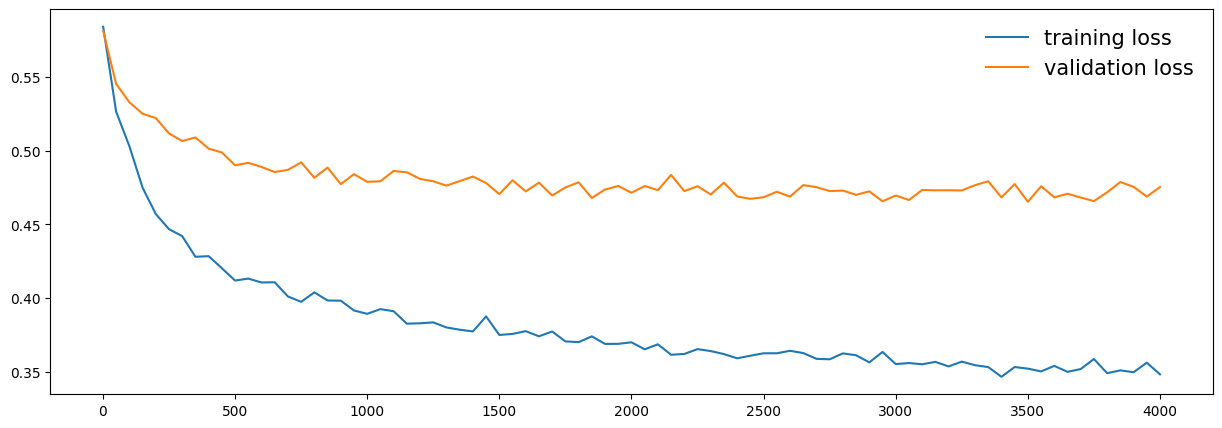

In [74]:
fig = plt.figure(figsize=(15,5))
plt.plot(x_axis, trainlosses, label='training loss')
plt.plot(x_axis, devlosses, label='validation loss')
plt.legend(frameon = False, fontsize = 15)
plt.show

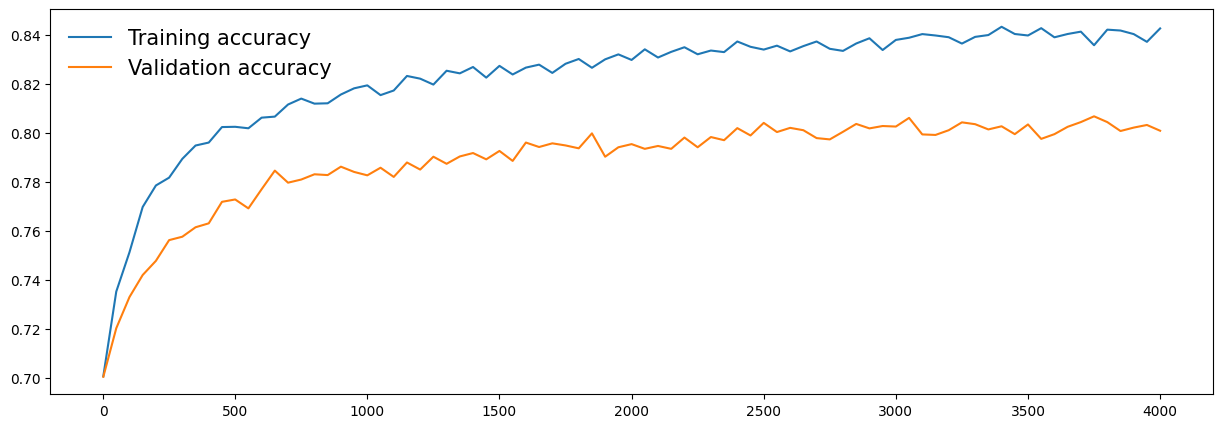

In [75]:
fig = plt.figure(figsize=(15, 5))
plt.plot(x_axis, trainacc, label="Training accuracy")
plt.plot(x_axis, devacc, label="Validation accuracy")
plt.legend(frameon=False, fontsize=15)
plt.show()

In [84]:
# ytesttorch = ytesttorch.cpu().numpy()
# if isinstance(ytesttorch, torch.Tensor):
#     ytesttorch = ytesttorch.cpu().numpy()\


ytesttorch

array([0., 1., 1., ..., 0., 0., 1.], dtype=float32)

In [89]:
import torch
from sklearn.metrics import accuracy_score

# Set model to evaluation mode
model.eval()

# Perform prediction
test_pred = model(xtesttorch)

# Convert logits to probabilities using softmax
test_pred = torch.exp(test_pred)

# Get top class predictions
top_p, top_class_test = test_pred.topk(1, dim=1)

# Remove the singleton dimension
top_class_test = top_class_test.squeeze(1)

# Move PyTorch tensors to CPU and convert to numpy arrays
top_class_test = top_class_test.cpu().numpy()

# Ensure ytesttorch is on the CPU and converted to a numpy array
if isinstance(ytesttorch, torch.Tensor):
    ytesttorch = ytesttorch.cpu().numpy()

# Calculate accuracy
acc_test = accuracy_score(ytesttorch, top_class_test)

print(f"Test Accuracy: {acc_test:.4f}")

Test Accuracy: 0.8083


In [91]:
checkpoint = {"input:": xtrain.shape[1], "state_dict": model.state_dict()}
torch.save(checkpoint, "checkpoint.pth")